In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
import seaborn as sns
import numpy as np


#Normal Sugar Level Before meal <100mg/Dl (bw 60-90 is ideal) After Meal <140mg/Dl
#Ideal Blood Pressure is B/W 80-120 
#Tricep Normal SkinFold Thickness Female= 15-16.5mm
#Insulin <100 - Normal ; between 100-125- Pre-Diabetic ; >125-Diabetic
#Normal BMI - 18.5-24.9
#Theoretically glucose and insulin has direct correlation

##### Statistic Skewness Values:
< -1 or > 1 highly skewed

between -1 and -.5 or .5 and 1 distribution is moderately skewed

between -.5 and .5 distribution is approximately symmetric

In [42]:
Diabetes=pd.read_csv("diabetes.csv")

# **  Data Description **


In [223]:
Diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

It is evident that the data has anomalies and data has skewness.:

1) If we see the all 4 quartiles of pregnancy , there is huge deviation between 75% and maximum, hence there lies an anomaly in the variable. Such pattern exist in other variables  

2) Variables like Glucose, BP, SkinThickness, Insulin, BMI can never be zero, hence it is an anomaly , in these variable there are lower and upper limit outliers , which shall be treated as per industry standards

In [225]:
Diabetes.shape # Shape of data is R-768 C-9

(768, 9)

In [227]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
Diabetes[~(Diabetes[cols]==0).any(axis=1)].shape

(392, 9)

In [62]:
pd.pivot_table?

In [67]:
pd.crosstab?

In [106]:
x=pd.crosstab(index=Diabetes.Outcome,columns=Diabetes.Pregnancies)

In [74]:
x.to_csv("p.csv")

In [107]:
x=pd.DataFrame(x)

In [108]:
x.cumsum(axis=1)

Pregnancies  0    1    2    3    4    5    6    7    8    9    10   11   12  \
Outcome                                                                       
0            73  179  263  311  356  392  426  446  462  472  486  490  495   
1            38   67   86  113  136  157  173  198  220  238  248  255  259   

Pregnancies   13  
Outcome           
0            500  
1            268

In [100]:
x.

Pregnancies   0    1   2   3   4   5   6   7   8   9  10  11  12  13  csum
Outcome                                                                   
0            73  106  84  48  45  36  34  20  16  10  14   4   5   5   611
1            38   29  19  27  23  21  16  25  22  18  10   7   4   9   403

In [104]:
x[x.index==1]=0

In [105]:
x

Pregnancies   0    1   2   3   4   5   6   7   8   9  10  11  12  13  csum
Outcome                                                                   
0            73  106  84  48  45  36  34  20  16  10  14   4   5   5   611
1             0    0   0   0   0   0   0   0   0   0   0   0   0   0     0

In [98]:
1014-768

246

In [101]:
x[x.index==2]=x.sum()

ValueError: cannot set using a list-like indexer with a different length than the value

In [93]:
73+106+84+48+45+36+34+36+38

500

In [ ]:
np.nonzero

# Data Exploration on Basis of Outcome 

In [228]:
Diabetes.groupby(['Outcome']).agg(['mean','std'])

Pregnancies               Glucose            BloodPressure             \
               mean       std        mean        std          mean        std   
Outcome                                                                         
0          3.298000  3.017185  109.980000  26.141200     68.184000  18.063075   
1          4.865672  3.741239  141.257463  31.939622     70.824627  21.491812   

        SkinThickness                Insulin                    BMI            \
                 mean        std        mean         std       mean       std   
Outcome                                                                         
0           19.664000  14.889947   68.792000   98.865289  30.304200  7.689855   
1           22.164179  17.679711  100.335821  138.689125  35.142537  7.262967   

        DiabetesPedigreeFunction                  Age             
                            mean       std       mean        std  
Outcome                                                           
0                       0.429734  0.299085  31.190000  11.667655  
1                       0.550500  0.372354  37.067164  10.968254

## Glucose

#### 1) Glucose or Sugar Level in Blood can Neevr be 0 hence it is a proven outlier or you can consider it as a missing value
#### 2) Average of Sugar level in Non Diabetic Woman is 109.98 with standard deviation of 26.14, thus 95.8% of women who are non diabetic lies between 57.7 & 162.26,  . The kde curve for the non diabetic women is almost normal
#### 3) Average of Sugar level in Diabetic Woman is 141.26 with standard deviation of 31.93, which states 99.25% of women sugar level lies between 77.38 & 205.14 and the data is skewed
#### 4) Skewnes of variable is .47 which means variable is approximately symmetric, but when we bifercate Glucose by Outcome , it becomes moderately positive skewed for non diabetic 
#### 5) Its very rare for non diabetic women to have glucose level below 50 and above 170 , and for diabetic women to have glucose level below 50

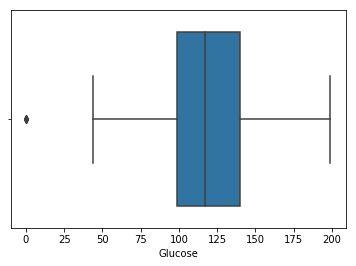

In [8]:
sns.boxplot(Diabetes.Glucose)

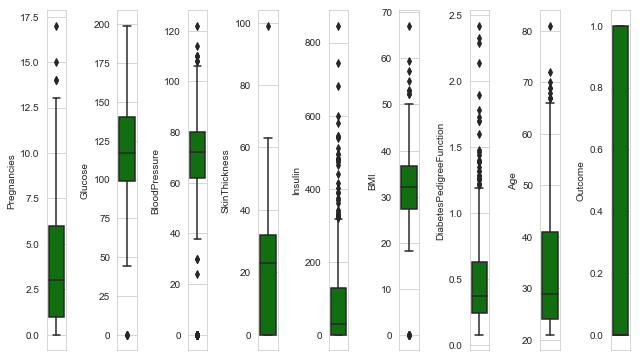

In [43]:
l = Diabetes.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Diabetes[l[i]],color='green',orient='v')
    plt.tight_layout()

In [27]:
l=Diabetes.iloc[:,0:8].columns.values

In [44]:
def outliertreat(x):
    Perc_01=x.quantile(.1)
    Perc_99=x.quantile(.99)
    Perc_25=x.quantile(.25)
    Perc_75=x.quantile(.75)
    IQR=Perc_75 - Perc_25
    Lower_Lim=Perc_25 - 1.5 * IQR
    Upper_Lim=Perc_75 + 1.5 * IQR
    minimum=x.min()
    maximum=x.max()
    return pd.Series([Perc_01,Perc_99,Perc_25,Perc_75,IQR,Lower_Lim,Upper_Lim,minimum,maximum],
                     index=["Perc_01","Perc_99","Perc_25","Perc_75","IQR",
                            "Lower_Lim","Upper_Lim","minimum","maximum"])
Diabetes[l].apply(lambda x: outliertreat(x)).T

Perc_01    Perc_99   Perc_25    Perc_75       IQR  \
Pregnancies                 0.000   13.00000   1.00000    6.00000    5.0000   
Glucose                    85.000  196.00000  99.00000  140.25000   41.2500   
BloodPressure              54.000  106.00000  62.00000   80.00000   18.0000   
SkinThickness               0.000   51.33000   0.00000   32.00000   32.0000   
Insulin                     0.000  519.90000   0.00000  127.25000  127.2500   
BMI                        23.600   50.75900  27.30000   36.60000    9.3000   
DiabetesPedigreeFunction    0.165    1.69833   0.24375    0.62625    0.3825   
Age                        22.000   67.00000  24.00000   41.00000   17.0000   
Outcome                     0.000    1.00000   0.00000    1.00000    1.0000   

                          Lower_Lim  Upper_Lim  minimum  maximum  
Pregnancies                  -6.500     13.500    0.000    17.00  
Glucose                      37.125    202.125    0.000   199.00  
BloodPressure                35.000    107.000    0.000   122.00  
SkinThickness               -48.000     80.000    0.000    99.00  
Insulin                    -190.875    318.125    0.000   846.00  
BMI                          13.350     50.550    0.000    67.10  
DiabetesPedigreeFunction     -0.330      1.200    0.078     2.42  
Age                          -1.500     66.500   21.000    81.00  
Outcome                      -1.500      2.500    0.000     1.00

In [47]:
Diabetes.Pregnancies.clip_upper(13,inplace=True)
Diabetes.Glucose.clip_lower(37.125,inplace=True)
Diabetes.BloodPressure.clip_lower(35,inplace=True)
Diabetes.BloodPressure.clip_upper(107,inplace=True)
Diabetes.SkinThickness.clip_upper(80,inplace=True)
Diabetes.Insulin.clip_upper(318.125,inplace=True)
Diabetes.BMI.clip_lower(13.35,inplace=True)
Diabetes.BMI.clip_upper(50.55,inplace=True)
Diabetes.DiabetesPedigreeFunction.clip_upper(1.200,inplace=True)
Diabetes.Age.clip_upper(67,inplace=True)


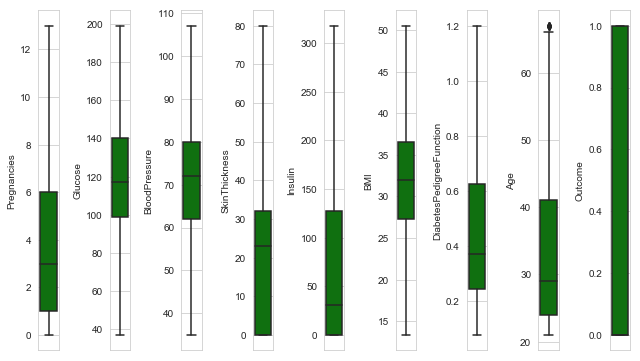

In [48]:
l = Diabetes.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Diabetes[l[i]],color='green',orient='v')
    plt.tight_layout()

In [49]:
Diabetes.groupby(['Outcome']).agg(['mean','std'])

Pregnancies               Glucose            BloodPressure             \
               mean       std        mean        std          mean        std   
Outcome                                                                         
0          3.298000  3.017185  110.202750  25.347672     69.508000  13.549210   
1          4.835821  3.664168  141.534515  30.851612     72.880597  15.115805   

        SkinThickness               Insulin                    BMI            \
                 mean        std       mean         std       mean       std   
Outcome                                                                        
0           19.664000  14.889947  65.113750   83.693801  30.527500  6.849655   
1           22.093284  17.406429  89.583489  108.036975  35.105597  6.432723   

        DiabetesPedigreeFunction                 Age             
                            mean       std      mean        std  
Outcome                                                          
0                       0.420264  0.262928  31.14200  11.498969  
1                       0.531022  0.311596  37.05597  10.936000

In [52]:
Diabetes.groupby(['Outcome','Pregnancies']).agg(['mean'])

Glucose BloodPressure SkinThickness     Insulin  \
                           mean          mean          mean        mean   
Outcome Pregnancies                                                       
0       0            111.945205     71.123288     21.054795   72.604452   
        1            105.305425     66.839623     23.047170   79.656840   
        2            105.214286     64.440476     20.107143   70.967262   
        3            109.604167     67.166667     17.520833   60.585938   
        4            117.555556     72.288889     18.422222   69.002778   
        5            111.666667     74.638889     17.166667   40.368056   
        6            115.352941     69.470588     18.705882   68.797794   
        7            121.000000     73.850000     19.350000   71.306250   
        8            106.625000     75.312500     12.937500   14.500000   
        9            107.000000     70.400000     22.400000   62.812500   
        10           117.571429     75.357143     10.571429   25.071429   
        11           113.250000     81.000000     10.000000    0.000000   
        12           111.000000     80.200000     24.600000   31.800000   
        13           117.200000     74.400000     22.000000   50.000000   
1       0            144.236842     68.657895     24.605263   80.322368   
        1            143.793103     72.689655     29.517241  123.939655   
        2            135.473684     70.894737     27.210526  118.598684   
        3            148.444444     69.444444     24.629630  121.087963   
        4            139.913043     70.043478     10.913043   51.782609   
        5            132.958333     78.809524     17.761905   74.863095   
        6            134.695312     72.750000     15.375000   48.757812   
        7            148.800000     72.520000     21.040000   84.495000   
        8            150.000000     76.681818     20.500000  120.880682   
        9            144.944444     81.888889     20.055556   57.555556   
        10           125.600000     70.000000     22.900000   48.400000   
        11           134.000000     75.285714     28.428571  102.857143   
        12           116.750000     71.500000     30.250000  211.781250   
        13           138.111111     75.111111     21.222222   48.555556   

                           BMI DiabetesPedigreeFunction        Age  
                          mean                     mean       mean  
Outcome Pregnancies                                                 
0       0            32.252055                 0.441822  27.095890  
        1            29.616038                 0.450557  25.254717  
        2            29.997619                 0.460869  25.833333  
        3            29.368750                 0.358354  28.770833  
        4            31.255556                 0.385422  30.066667  
        5            31.470833                 0.359278  39.305556  
        6            29.983824                 0.425618  37.147059  
        7            30.642500                 0.405500  42.500000  
        8            30.693750                 0.509500  49.562500  
        9            28.840000                 0.311100  44.600000  
        10           30.114286                 0.393857  43.357143  
        11           37.125000                 0.259000  40.750000  
        12           30.560000                 0.301200  48.200000  
        13           33.280000                 0.405600  46.800000  
1       0            38.475000                 0.559368  28.578947  
        1            37.639655                 0.600138  35.103448  
        2            34.578947                 0.542474  32.947368  
        3            32.548148                 0.525222  29.481481  
        4            33.873913                 0.508217  37.956522  
        5            36.669048                 0.458952  38.380952  
        6            31.775000                 0.414125  44.000000  
        7            34.756000            

In [53]:
Diabetes[(Diabetes.Outcome==1) & (Diabetes.Pregnancies==12)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
215           12    151.0             70             40  271.000  41.8   
254           12     92.0             62              7  258.000  27.6   
375           12    140.0             82             43  318.125  39.2   
510           12     84.0             72             31    0.000  29.7   

     DiabetesPedigreeFunction  Age  Outcome  
215                     0.742   38        1  
254                     0.926   44        1  
375                     0.528   58        1  
510                     0.297   46        1

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


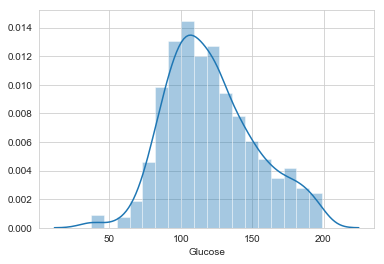

In [55]:
sns.distplot(Diabetes.Glucose)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


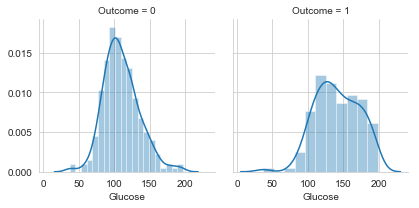

In [56]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'Glucose')



In [57]:
Diabetes.Glucose.skew()

0.4179462206775283

In [8]:
Diabetes.Glucose[Diabetes.Outcome==1].shape

(268,)

In [9]:
Perc_concentration_diabetic_women=266*100/268

In [10]:
Diabetes.Glucose[(Diabetes.Outcome==0) & (Diabetes.Glucose>57.6) & (Diabetes.Glucose <162.27)].shape

(477,)

In [11]:
Diabetes.Glucose[Diabetes.Outcome==0].shape

(500,)

In [13]:
Perc_concentration_non_diabetic_women=477*100/500

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


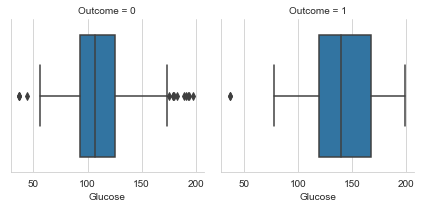

In [58]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'Glucose')

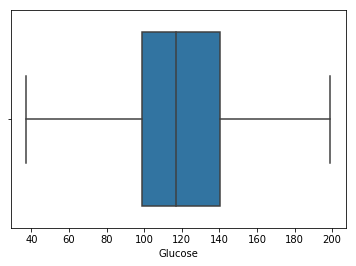

In [27]:
sns.boxplot(Diabetes.Glucose)

In [19]:
iqr=Diabetes.Glucose.quantile(.75)-Diabetes.Glucose.quantile(.25)
Lower_ND_Cut_G=Diabetes.Glucose.quantile(.25)- 1.5 * iqr

In [18]:
Lower_ND_Cut_G

37.125

In [21]:
Diabetes.Glucose.quantile(.10)

85.0

In [23]:
Diabetes.Glucose.quantile(.01)

57.0

Since 1% of Glucose data is 57 and below so i would consider 37.125 as the lower limit for outlier treatment 

In [24]:
Diabetes.Glucose.clip_lower(Lower_ND_Cut_G,inplace=True)

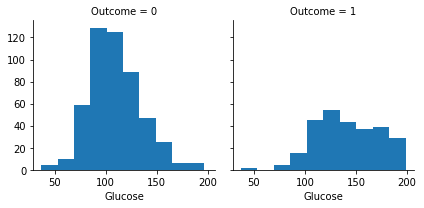

In [25]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(plt.hist,'Glucose')


/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


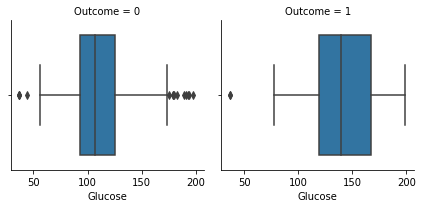

In [26]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'Glucose')

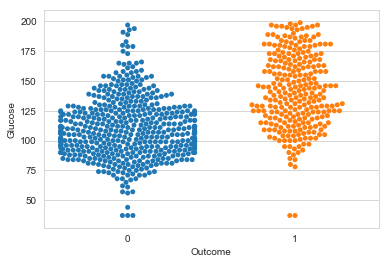

In [59]:
sns.swarmplot(Diabetes.Outcome,Diabetes.Glucose)

In [112]:
mean_Glucose_Level_non_Diabetic=Diabetes.Glucose[Diabetes.Outcome==0].mean()
sd_Glucose_Level_non_Diabetic=Diabetes.Glucose[Diabetes.Outcome==0].std()
mean_Glucose_Level_Diabetic=Diabetes.Glucose[Diabetes.Outcome==1].mean()
sd_Glucose_Level_Diabetic=Diabetes.Glucose[Diabetes.Outcome==1].std()

## Pregnancies

1) Women who are non diabetic have on an average 3 children with standard deviation of 3 , which means 94.4% of females are having number of babies between 0 to 9

2) Women who are diabetic have on an average 5 children with standard deviation of 4, which means 97% of females are having number of babies between 0 to 12

3) This study doesnt state that diabetes have huge or severe complication in delivery of child

4) Pregnancy variable has moderate positive skewness , but when we bifercate it as per outcome variable then it is highly positive skewed when outcome variable is 0 else it is approximately symmetric

5) For non diabetic women , women having pregnancy above 11 is a rare 

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


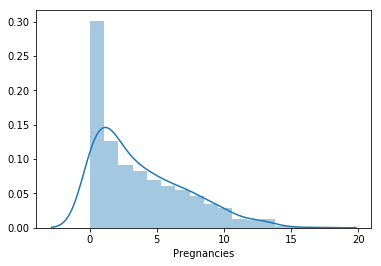

In [29]:
sns.distplot(Diabetes.Pregnancies)

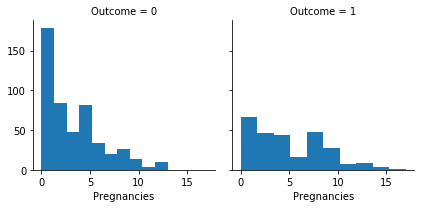

In [30]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(plt.hist,'Pregnancies')

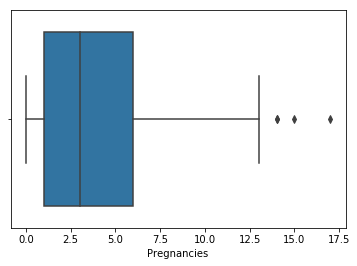

In [31]:
sns.boxplot(Diabetes.Pregnancies)

In [32]:
IQR_P=Diabetes.Pregnancies.quantile(.75)-Diabetes.Pregnancies.quantile(.25)
U_Cut_P=Diabetes.Pregnancies.quantile(.75)+1.5*IQR_P
Diabetes.Pregnancies.clip_upper(U_Cut_P,inplace=True)

In [33]:
Diabetes.Pregnancies.skew()

0.8539617478323778

In [34]:
Diabetes.Pregnancies[Diabetes.Outcome==0].skew()

1.114105089511448

In [35]:
Diabetes.Pregnancies[Diabetes.Outcome==1].skew()

0.41272712073768253

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


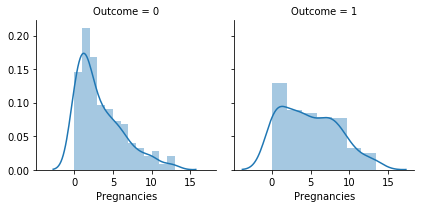

In [36]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'Pregnancies')

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


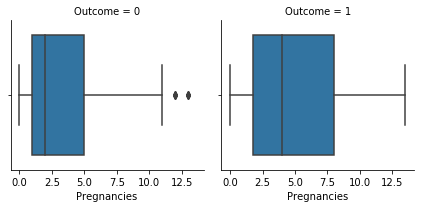

In [37]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'Pregnancies')

In [38]:
mean_Preg_non_Diabetic=Diabetes.Pregnancies[Diabetes.Outcome==0].mean()
sd_Preg_non_Diabetic=Diabetes.Pregnancies[Diabetes.Outcome==0].std()
mean_Preg_Diabetic=Diabetes.Pregnancies[Diabetes.Outcome==1].mean()
sd_Preg_Diabetic=Diabetes.Pregnancies[Diabetes.Outcome==1].std()

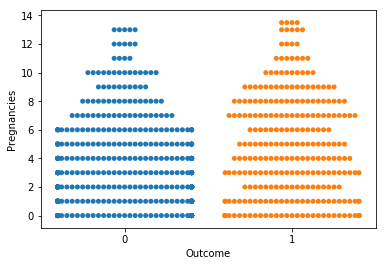

In [39]:
sns.swarmplot(Diabetes.Outcome,Diabetes.Pregnancies)

In [40]:
Diabetes.Pregnancies[(Diabetes.Outcome==0)&(Diabetes.Pregnancies>=0)&(Diabetes.Pregnancies<10)].shape

(472,)

In [41]:
Diabetes.Pregnancies[Diabetes.Outcome==0].shape

(500,)

In [42]:
Perc_Concentration_Non_Diabetic=472/5

In [43]:
Perc_Concentration_Non_Diabetic

94.4

In [44]:
Diabetes.Pregnancies[(Diabetes.Outcome==1)&(Diabetes.Pregnancies>=0)&(Diabetes.Pregnancies<13)].shape

(259,)

In [45]:
Diabetes.Pregnancies[Diabetes.Outcome==1].shape

(268,)

In [46]:
Perc_Concentration_Diabetic=259*100/268

In [47]:
Perc_Concentration_Diabetic

96.64179104477611

## Blood Pressure

1) Average Blood Pressure of Non-Diabetic Women is 69.5 with standard deviation of 13.54 , which implies 94% of women blood pressure lies between 42.4 and 96.6. Majority of women have blood pressure level in between 60 to 80 

2) Average Blood Pressure of Diabetic Women is 72.9 with standard deviation of 15.11 , which implies 91% of women blood pressure lies between 42.6 and 103.1. Majority of women have BP in between 60 to 95

3) It implies that people having diabetes can have there blood pressure level in control which is between 80-120 as ideal BP level is 80-120

4) Blood Pressure Variable is approximately symmetrical, but if we bifercate it as per outcome, it is approximately symmetric for outcome = 0 , else  it is highly negative skewed

5) There are very less number of non diabetic women whose BP is less than 40 and greater than 100.

6) There are very less number of diabetic women whose BP is less than 50 and greater than 100

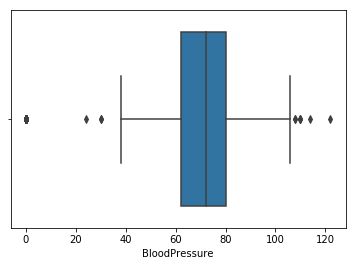

In [48]:
sns.boxplot(Diabetes.BloodPressure)

In [49]:
IQR_BP=Diabetes.BloodPressure.quantile(.75)-Diabetes.BloodPressure.quantile(.25)
Lower_Cut=Diabetes.BloodPressure.quantile(.25)-(1.5*IQR_BP)

In [50]:
Lower_Cut

35.0

In [51]:
Diabetes.BloodPressure.quantile(.10)

54.0

In [54]:
Diabetes.BloodPressure.quantile(.05)

38.7

In [55]:
U_Cut_BP=Diabetes.BloodPressure.quantile(.75)+(1.5*IQR_BP)


In [56]:
U_Cut_BP

107.0

In [57]:
Diabetes.BloodPressure.quantile(.75)

80.0

In [58]:
Diabetes.BloodPressure.quantile(.90)

88.0

In [59]:
Diabetes.BloodPressure.quantile(.99)

106.0

In [60]:
Diabetes.BloodPressure.min()

0

In [61]:
Diabetes.BloodPressure.max()

122

Since 99% of Blood pressure of women is 106 and below  and 1% of blood pressure is 0 , we will consider the upper and lower limit to be decided from IQR

In [62]:
Diabetes.BloodPressure.clip_lower(Lower_Cut,inplace=True)
Diabetes.BloodPressure.clip_upper(U_Cut_BP,inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


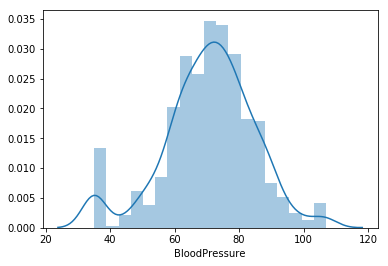

In [63]:
sns.distplot(Diabetes.BloodPressure)

In [64]:
Diabetes.BloodPressure.skew()

-0.4060355281846069

In [65]:
Diabetes.BloodPressure[Diabetes.Outcome==0].skew()

-0.31178850508610434

In [66]:
Diabetes.BloodPressure[Diabetes.Outcome==1].skew()

-0.637913319651631

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


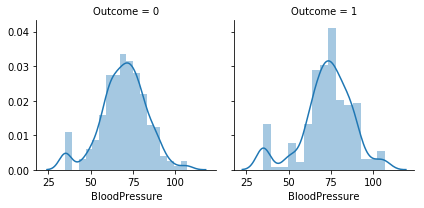

In [67]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'BloodPressure')

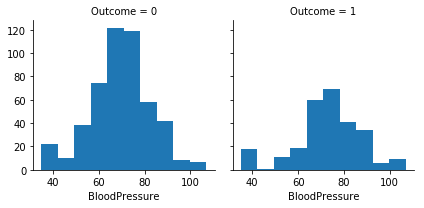

In [68]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(plt.hist,'BloodPressure')

In [69]:
mean_BP_non_Diabetic=Diabetes.BloodPressure[Diabetes.Outcome==0].mean()
sd_BP_non_Diabetic=Diabetes.BloodPressure[Diabetes.Outcome==0].std()
mean_BP_Diabetic=Diabetes.BloodPressure[Diabetes.Outcome==1].mean()
sd_BP_Diabetic=Diabetes.BloodPressure[Diabetes.Outcome==1].std()

In [70]:
Diabetes.BloodPressure[(Diabetes.Outcome==0)&(Diabetes.BloodPressure>42.39)&(Diabetes.BloodPressure<96.7)].shape

(470,)

In [71]:
Diabetes.BloodPressure[(Diabetes.Outcome==0)].shape

(500,)

In [72]:
Perc_Conentration_Non_Diabetic=470/5

In [73]:
Perc_Conentration_Non_Diabetic

94.0

In [74]:
Diabetes.BloodPressure[(Diabetes.Outcome==1)&(Diabetes.BloodPressure>42.59)&(Diabetes.BloodPressure<103.2)].shape

(243,)

In [75]:
Diabetes.BloodPressure[(Diabetes.Outcome==1)].shape

(268,)

In [76]:
Perc_Conentration_Diabetic=243*100/268

In [77]:
Perc_Conentration_Diabetic

90.67164179104478

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


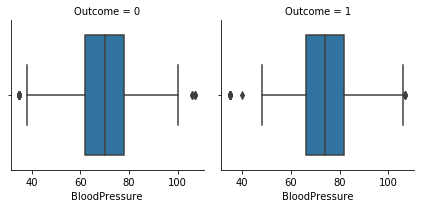

In [78]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'BloodPressure')

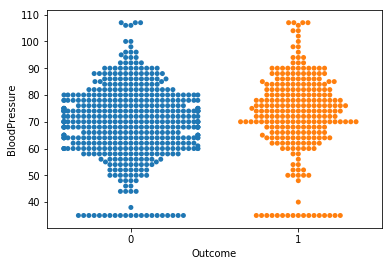

In [79]:
sns.swarmplot(Diabetes.Outcome,Diabetes.BloodPressure)

##  SkinThickness

1) Mean skinfold thickness value of Non-Diabetic woman is 21.9 with standard deviation of 11.9, which states 66.8% of women have skinfold thickness of triceps between 9.3 and 42.6

2) Mean skinfold thickness value of Diabetic woman is 29.3 with standard deviation of 8.22, which states 60%% of women have skinfold thickness of triceps between 12.9 and 45.8

3) Hence SkinFold Thickness of Tricep is a good but not reliable measure of classifying in diabetic and non diabetic

4) Skinfold Thickness of a person can be never 0 hence we can consider it as missing value because data has significant amount of 0 so we have done imputation using median since it wasnt a normal distributed data 

5) Skinfold Thickness variable after imputation and outlier treatment is approximately symmetric but when we bifercate it with respect to outcome variable , for non diabetic women it is moderately positive skewed, where as for diabetic women it is approximately symmetric

6) There are very less non diabetic women who have thickness above 41

7) It is a moderate skewed variable

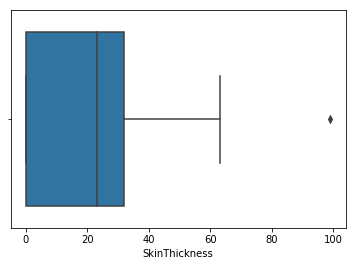

In [80]:
sns.boxplot(Diabetes.SkinThickness)

In [81]:
IQR_SKFT=Diabetes.SkinThickness.quantile(.75)-Diabetes.SkinThickness.quantile(.25)
ucut=Diabetes.SkinThickness.quantile(.75)+1.5*IQR_SKFT
lcut=Diabetes.SkinThickness.quantile(.25)-1.5*IQR_SKFT



In [82]:
ucut

80.0

In [83]:
lcut

-48.0

In [84]:
Diabetes.SkinThickness.quantile(.99)

51.33000000000004

In [96]:
Diabetes.SkinThickness.quantile(.30)

8.199999999999989

In [95]:
Diabetes.SkinThickness.max()

99

Since 99% of women having skinthickness of 51.33 and below and there are 30% of women are having 8.2 and below , its peculiar that 29% of women have value of skinthickness as 0

so here we will use upper(99%) and lower(30%)[ since value of skinthickness can not be 0] percentiles to deal with outlier

In [97]:
Diabetes.SkinThickness.clip_upper(Diabetes.SkinThickness.quantile(.99),inplace=True)
Diabetes.SkinThickness.clip_lower(Diabetes.SkinThickness.quantile(.30),inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


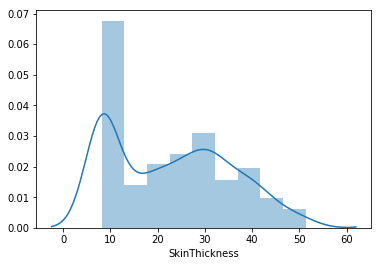

In [98]:
sns.distplot(Diabetes.SkinThickness)

In [99]:
Diabetes.SkinThickness.skew()

0.29117788587424326

In [100]:
Diabetes.SkinThickness[Diabetes.Outcome==0].skew()

0.41620508912691395

In [101]:
Diabetes.SkinThickness[Diabetes.Outcome==1].skew()

0.04997998930333311

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


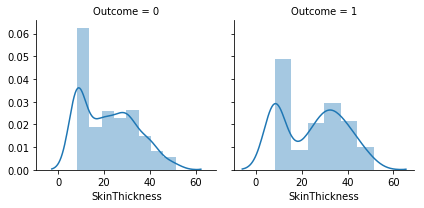

In [102]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'SkinThickness')

In [103]:
mean_SKFT_Level_non_Diabetic=Diabetes.SkinThickness[Diabetes.Outcome==0].mean()
sd_SKFT_Level_non_Diabetic=Diabetes.SkinThickness[Diabetes.Outcome==0].std()
mean_SKFT_Level_Diabetic=Diabetes.SkinThickness[Diabetes.Outcome==1].mean()
sd_SKFT_Level_Diabetic=Diabetes.SkinThickness[Diabetes.Outcome==1].std()

In [114]:
mean_SKFT_Level_non_Diabetic + 2* sd_SKFT_Level_non_Diabetic

45.859454142123724

In [115]:
Diabetes.SkinThickness[(Diabetes.Outcome==0)&(Diabetes.SkinThickness>0)&(Diabetes.SkinThickness<45.9)].shape

(485,)

In [116]:
Perc_Concentration_Non_Diabetic=485/5

In [117]:
Perc_Concentration_Non_Diabetic

97.0

In [108]:
Diabetes.SkinThickness[(Diabetes.Outcome==1)&(Diabetes.SkinThickness>12.9)&(Diabetes.SkinThickness<45.81)].shape

(162,)

In [109]:
Perc_Concentration_Diabetic=162*100/268

In [110]:
Perc_Concentration_Diabetic

60.44776119402985

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


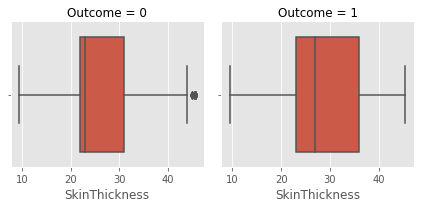

In [464]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'SkinThickness')

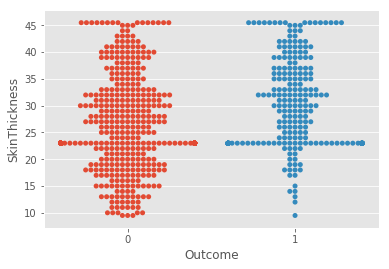

In [454]:
sns.swarmplot(Diabetes.Outcome,Diabetes.SkinThickness)

## Insulin

1) Mean insulin level of non diabetic women is 77.9 and standard deviation is 68.4 , which means 93.2% of women insuline level lies between 0 to 214.6
 
2) Mean insulin level of diabetic women is 101.5 with standard deviation of 87.3, which states 100% of women have insulin level between 0 to 276.1

3) Type 1 Diabetic patients have low insulin levels  but low insulin levels can be associated with other dieseases also like Hypopituitarism, pancreatic cancer or pancreatic disease. High insulin levels are generally seen in Type 2 Diabetes , but patients who are not diabetic can have high insulin level because of other health issues like hyperinsulinemia , obessity , heart disease, use of drugs, etc, so non diabetic women have high insulin because of other underlying factors

4) Insulin is highly positive skewed data , but when we bifercate it with respect to outcome variable , it is highly positive skewed for non diabetic women and moderately positive skewed data for diabetic

5) It is very rare for non diabetic women having insulin levels above 200 

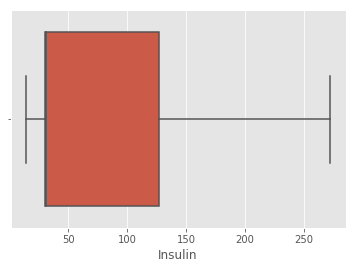

In [468]:
sns.boxplot(Diabetes.Insulin)

In [470]:
IQR_I=Diabetes.Insulin.quantile(.75)-Diabetes.Insulin.quantile(.25)
ucut=Diabetes.Insulin.quantile(.75) + 1.5 * IQR_I
Diabetes.Insulin.clip_upper(ucut,inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


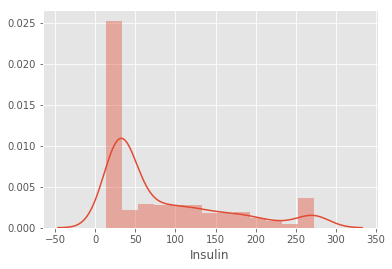

In [471]:
sns.distplot(Diabetes.Insulin)

In [472]:
Diabetes.Insulin.skew()

1.2399972461039153

In [473]:
Diabetes.Insulin[Diabetes.Outcome==0].skew()

1.5338986383919997

In [474]:
Diabetes.Insulin[Diabetes.Outcome==1].skew()

0.7984522834211514

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


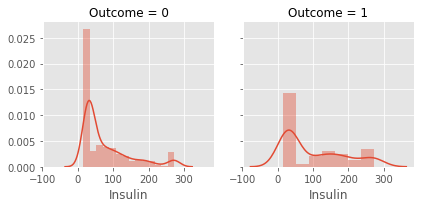

In [475]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'Insulin')

In [476]:
mean_insulin_Level_non_Diabetic=Diabetes.Insulin[Diabetes.Outcome==0].mean()
std_insulin_Level_non_Diabetic=Diabetes.Insulin[Diabetes.Outcome==0].std()
mean_insulin_Level_Diabetic=Diabetes.Insulin[Diabetes.Outcome==1].mean()
std_insulin_Level_Diabetic=Diabetes.Insulin[Diabetes.Outcome==1].std()

In [483]:
Diabetes.Insulin[(Diabetes.Outcome==0)&(Diabetes.Insulin>0)&(Diabetes.Insulin<214.61)].shape

(466,)

In [484]:
Perc_Concentration_Non_Diabetic=466/5

In [486]:
Diabetes.Insulin[(Diabetes.Outcome==1)&(Diabetes.Insulin>0)&(Diabetes.Insulin<276.2)].shape

(268,)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


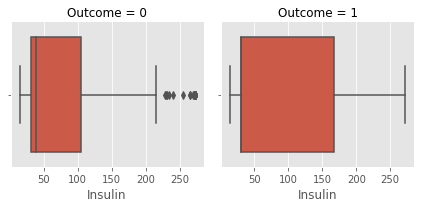

In [487]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'Insulin')

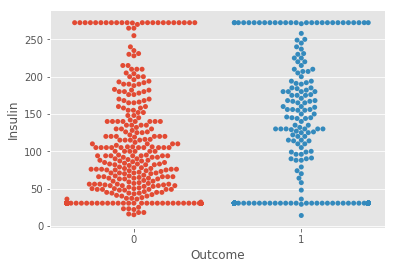

In [488]:
sns.swarmplot(Diabetes.Outcome,Diabetes.Insulin)

## BMI

1) Mean BMI level of non diabetic women is 30.5 and standard deviation is 6.8 , which means 95% of women BMI lies between 16.8 to 44.2
 
2) Mean BMI of diabetic women is 35.1 with standard deviation of 6.4, which states 94.4% of women have BMI between 22.2 to 47.9

3) Diabetic women are majorly concentrated on high BMI level

4) BMI variable is approximately symmetric but when we bifercate with respect to outcome, Non Diabetic women BMI is approximately symmetric whereas for Diabetic women it is the same 

5) It is very rare that BMI of non diabetic women is greater than 49 and BMI of Diabetic women less than 23

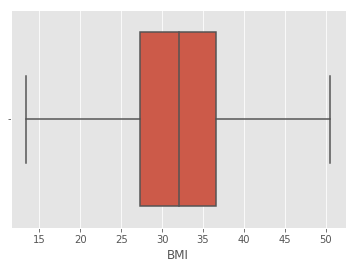

In [491]:
sns.boxplot(Diabetes.BMI)

In [490]:
IQR_BMI=Diabetes.BMI.quantile(.75)-Diabetes.BMI.quantile(.25)
lcut=Diabetes.BMI.quantile(.25)-1.5*IQR_BMI
ucut=Diabetes.BMI.quantile(.75)+1.5*IQR_BMI
Diabetes.BMI.clip_lower(lcut,inplace=True)
Diabetes.BMI.clip_upper(ucut,inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


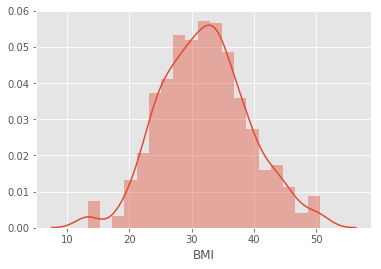

In [492]:
sns.distplot(Diabetes.BMI)

In [493]:
Diabetes.BMI.skew()

0.13580859812143145

In [494]:
Diabetes.BMI[Diabetes.Outcome==0].skew()

0.1671838433883163

In [495]:
Diabetes.BMI[Diabetes.Outcome==1].skew()

0.25592996722249334

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


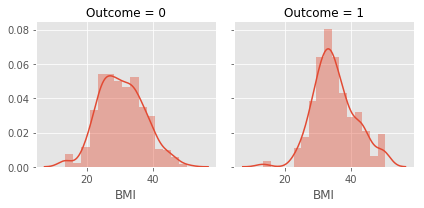

In [496]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'BMI')

In [497]:
mean_BMI_Level_non_Diabetic=Diabetes.BMI[Diabetes.Outcome==0].mean()
sd_BMI_Level_non_Diabetic=Diabetes.BMI[Diabetes.Outcome==0].std()
mean_BMI_Level_Diabetic=Diabetes.BMI[Diabetes.Outcome==1].mean()
sd_BMI_Level_Diabetic=Diabetes.BMI[Diabetes.Outcome==1].std()

In [506]:
Diabetes.BMI[(Diabetes.Outcome==0)&(Diabetes.BMI>16.79)&(Diabetes.BMI<44.21)].shape

(475,)

In [508]:
Perc_concentration_non_diabetic=475*100/500

In [509]:
Diabetes.BMI[(Diabetes.Outcome==1)&(Diabetes.BMI>22.19)&(Diabetes.BMI<47.9)].shape

(253,)

In [510]:
Perc_concentration_non_diabetic=253*100/268

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


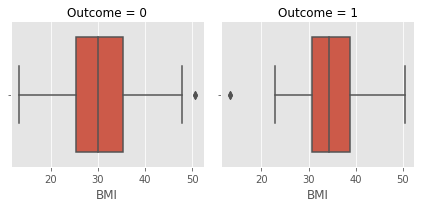

In [512]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'BMI')

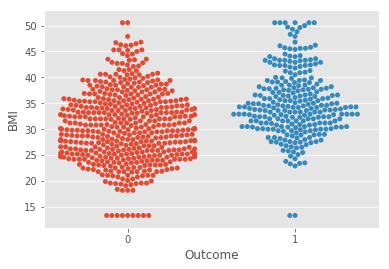

In [537]:
sns.swarmplot(Diabetes.Outcome,Diabetes.BMI)

# Diabetes Pedigree Function

1) Mean DPF level of non diabetic women is .42 and standard deviation is .26 , which means 94.8% of women DPF level lies between 0 to .95
 
2) Mean DPF level of diabetic women is .53 with standard deviation of .31, which states 92.5% of women have insulin level between 0 to 1.15

3) It is very rare for non diabetic women to have DPF more than 1

4) Variable is highly positive skewed , but when we bifercate it with respect to outcome, there is high positive skewness for non diabetic women and for diabetic women there is moderate positive skewness


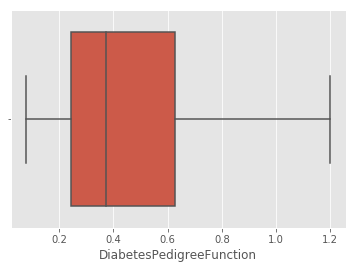

In [516]:
sns.boxplot(Diabetes.DiabetesPedigreeFunction)

In [515]:
IQR_DPF=Diabetes.DiabetesPedigreeFunction.quantile(.75)-Diabetes.DiabetesPedigreeFunction.quantile(.25)
ucut=Diabetes.DiabetesPedigreeFunction.quantile(.75)+1.5*IQR_DPF
Diabetes.DiabetesPedigreeFunction.clip_upper(ucut,inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


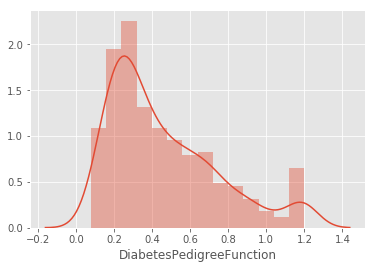

In [517]:
sns.distplot(Diabetes.DiabetesPedigreeFunction)

In [518]:
Diabetes.DiabetesPedigreeFunction.skew()

1.0244278033317116

In [519]:
Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==0].skew()

1.1732603512020994

In [520]:
Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==1].skew()

0.7455204948307618

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


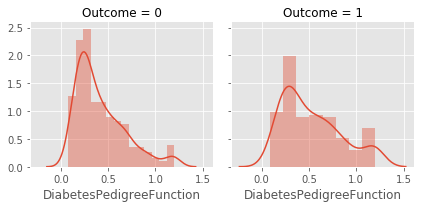

In [521]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'DiabetesPedigreeFunction')

In [522]:
mean_DPF_Level_non_Diabetic=Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==0].mean()
sd_DPF_Level_non_Diabetic=Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==0].std()
mean_DPF_Level_Diabetic=Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==1].mean()
sd_DPF_Level_Diabetic=Diabetes.DiabetesPedigreeFunction[Diabetes.Outcome==1].std()

In [531]:
Diabetes.DiabetesPedigreeFunction[(Diabetes.Outcome==0)&(Diabetes.DiabetesPedigreeFunction>0)&(Diabetes.DiabetesPedigreeFunction<.96)].shape

(474,)

In [532]:
perc_concentration_non_diabetic=474*100/500

In [534]:
Diabetes.DiabetesPedigreeFunction[(Diabetes.Outcome==1)&(Diabetes.DiabetesPedigreeFunction>0)&(Diabetes.DiabetesPedigreeFunction<1.16)].shape

(248,)

In [535]:
perc_concentration_diabetic=248*100/268

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


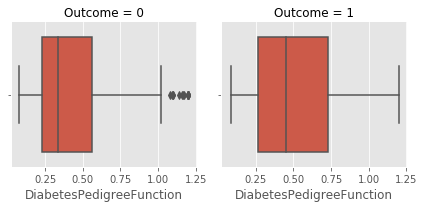

In [538]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'DiabetesPedigreeFunction')

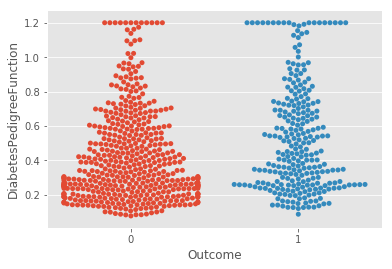

In [539]:
sns.swarmplot(Diabetes.Outcome,Diabetes.DiabetesPedigreeFunction)

## Age

1) Mean age of non-diabetic women is 31 and standard deviation is 11.4 , hence 92.8% of non diabetic women are between age of 8 to 54 years

2) Mean age of diabetic women is 37 and standard deviation is 10.9 , hence 96.6% of non diabetic women are between age of 15 to 59 years

3) Probablity of women between age of 20 to 30 will be non diabetic is .78 that means only 22% of women in this age range develops Diabetes 

4) Probability or chances of having diabetes increases after age of 30 

5) Age variable is highly positive skewed but when we bifercate it as per outcome variable , it remains same for non diabetic women , but it becomes moderate positive skewed for diabetic women, that means women having diabetes are more on the upper age side

6) There is a rare chance for women above age of 58 to be non diabetic



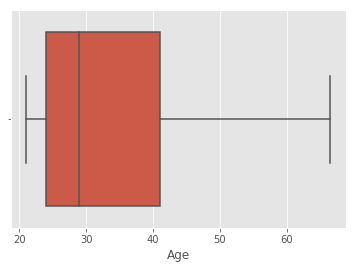

In [542]:
sns.boxplot(Diabetes.Age)

In [541]:
IQR_A=Diabetes.Age.quantile(.75)-Diabetes.Age.quantile(.25)
ucut=Diabetes.Age.quantile(.75)+1.5*IQR_A
Diabetes.Age.clip_upper(ucut,inplace=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


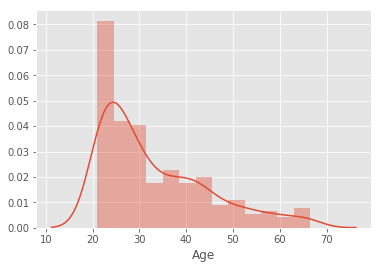

In [543]:
sns.distplot(Diabetes.Age)

In [544]:
Diabetes.Age.skew()

1.0671703233262797

In [545]:
Diabetes.Age[Diabetes.Outcome==0].skew()

1.4883041453547952

In [546]:
Diabetes.Age[Diabetes.Outcome==1].skew()

0.5591832679459625

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


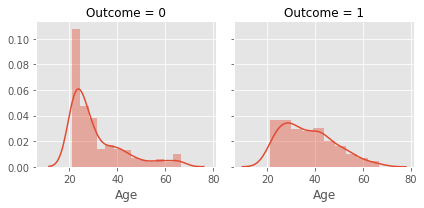

In [547]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.distplot,'Age')

In [548]:
mean_age_non_diabetic=Diabetes.Age[Diabetes.Outcome==0].mean()
sd_age_non_diabetic=Diabetes.Age[Diabetes.Outcome==0].std()
mean_age_diabetic=Diabetes.Age[Diabetes.Outcome==1].mean()
sd_age_diabetic=Diabetes.Age[Diabetes.Outcome==1].std()

In [563]:
Diabetes.Age[(Diabetes.Outcome==0)&(Diabetes.Age>7)&(Diabetes.Age<55)].shape

(464,)

In [564]:
Diabetes.Age[(Diabetes.Outcome==0)&(Diabetes.Age>19)&(Diabetes.Age<31)].shape

(327,)

In [566]:
Diabetes.Age[(Diabetes.Outcome==1)&(Diabetes.Age>19)&(Diabetes.Age<31)].shape

(90,)

In [567]:
Prob_non_Diabetic=327/(327+90)

0.7841726618705036

In [559]:
Diabetes.Age[(Diabetes.Outcome==1)&(Diabetes.Age>14)&(Diabetes.Age<60)].shape

(259,)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


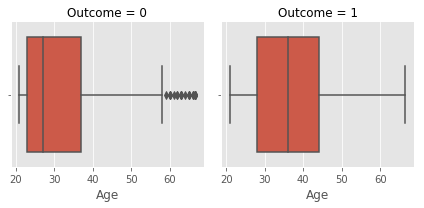

In [561]:
x=sns.FacetGrid(Diabetes,col='Outcome')
x=x.map(sns.boxplot,'Age')

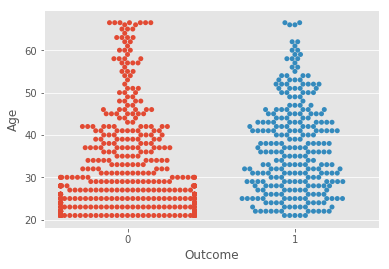

In [562]:
sns.swarmplot(Diabetes.Outcome,Diabetes.Age)

# Relationship Between Variables 

## Pregnancies & Glucose

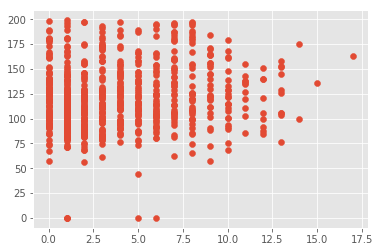

In [244]:
plt.scatter(Diabetes.Pregnancies,Diabetes.Glucose)

Most of the women have glucose levels in between 57 to 200 , but as the number of pregnancies increases number of women in the bracket decreases or you can say there are less number of women having pregnancies above 8



/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


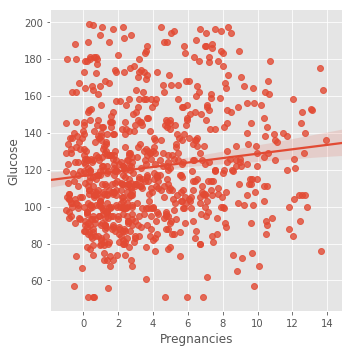

In [580]:
lm=sns.lmplot(x='Pregnancies',y='Glucose',data=Diabetes,x_jitter=True)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


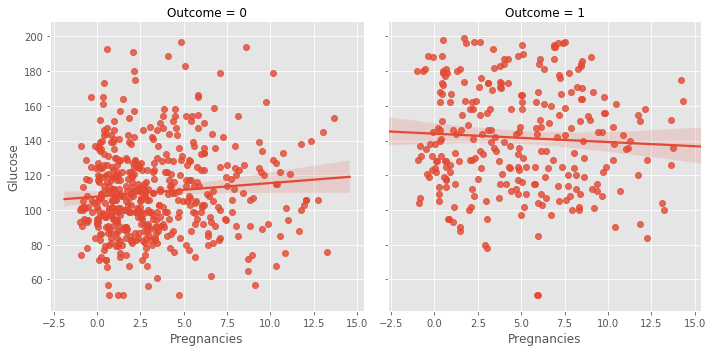

In [579]:
lm=sns.lmplot(x='Pregnancies',y='Glucose',data=Diabetes,col='Outcome',x_jitter=True)

Glucose Level and No. Of Pregnancies doesnt have perfect linear relationship as they have high errors , hence linear regression line is not the apt best fit line , the relation seems to be more of polynomial relationship

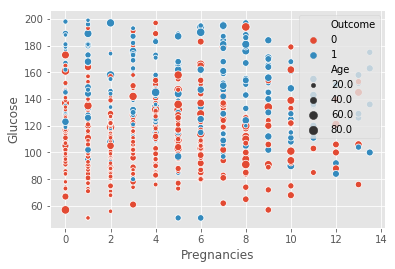

In [587]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Glucose,hue=Diabetes.Outcome, x_jitter=True, size=Diabetes.Age)

women whose pregnacy is 7 have more number of diabetic women as compared to others and between the suger level of 99 to 200, most of them are between age of 40 to 60. Most Pregnant Diabetic Women have Glucose level high above120

## Pregnancies Vs Blood Pressure

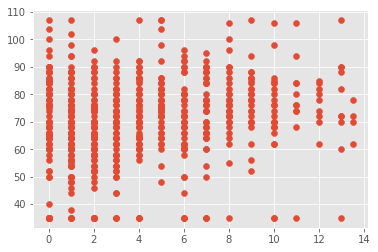

In [588]:
plt.scatter(Diabetes.Pregnancies,Diabetes.BloodPressure)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


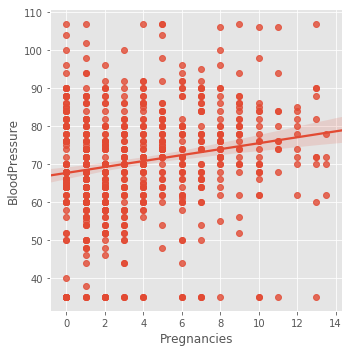

In [597]:
sns.lmplot(x="Pregnancies",y="BloodPressure",data=Diabetes)

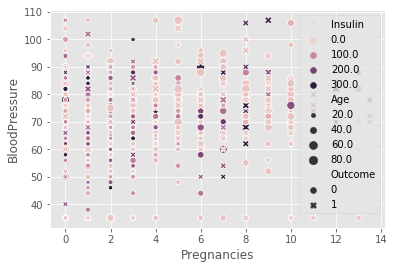

In [604]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.BloodPressure,style=Diabetes.Outcome,hue=Diabetes.Insulin,size=Diabetes.Age)

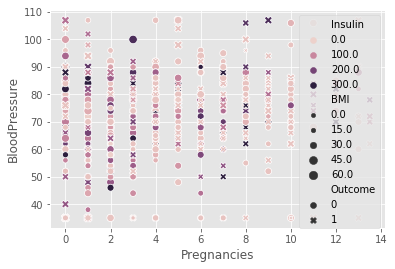

In [606]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.BloodPressure,style=Diabetes.Outcome,hue=Diabetes.Insulin,size=Diabetes.BMI)

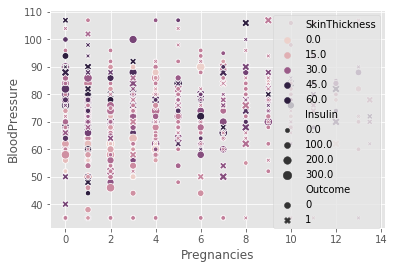

In [616]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.BloodPressure,style=Diabetes.Outcome,hue=Diabetes.SkinThickness,size=Diabetes.Insulin,x_jitter=True,y_jitter=True)

Majority of women are having blood pressure between 60 to 90 , There is no linear relationship found between Blood Pressure and Pregnancies, also the lmplot shows that Linear Regression line is not the best fit as the errors are huge, it has some polynomial sort of relation. Those who are classified as Diabetic , most of them have insulin level above 100 and are above . It can be said that those who are diabetic mostly have BMI in range of 15-45 . Blood pressure can be maintained while having diabeties . Those who have extreme level of low blood pressure i.e in the range of 40 to 55 are more on lower or no pregnancy side that is between 0 to 3 . This indicates as the number of pregnancy increases either the complication due to low blood pressure increases so they have to due dligently keep their BP in maintainable range .SkinThickness are high of both diabetic and non diabetic and even for women with pregnancy 0 , it states :

1) Women can be obessed
2) Women can be Pregnant 
3) Women can have other underlying disease 
4) Can be Diabetic
5) Genitically Inherited 

It is very peculiar to see that even at the age around 20's women have got upto 14 pregnancies , it states that the tribe comes from some backward community where they are not educated.

## Pregnancies Vs SkinThickness

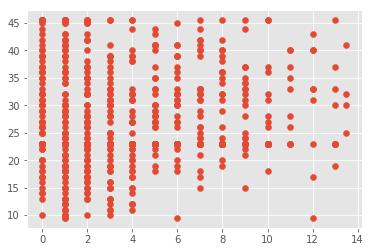

In [617]:
plt.scatter(Diabetes.Pregnancies,Diabetes.SkinThickness)

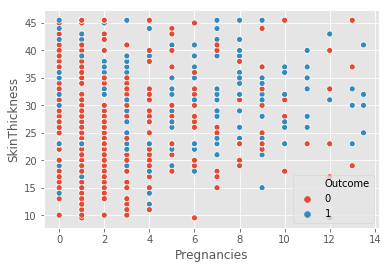

In [621]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.SkinThickness,hue=Diabetes.Outcome)

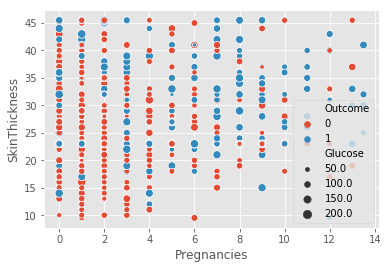

In [622]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.SkinThickness,hue=Diabetes.Outcome,size=Diabetes.Glucose)

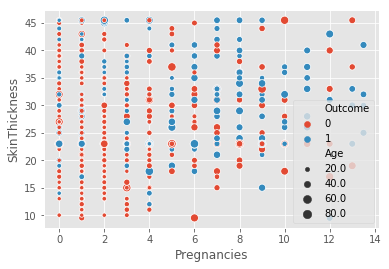

In [623]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.SkinThickness,hue=Diabetes.Outcome,size=Diabetes.Age)

Most of the Diabetic women have higher skin thickness and the number of diabetic women having greater skin thickness increases as the number of pregnancies increases. Also non diabetic women are also there who have high level of skinthickness . It doesnt significantly say that Skinthickness is on higher side because of Diabeties , it can be one of the following reason :

1) Diabeties

2) Obesity

3) Any other disease

Those who have high skinthickness , most of the women have high sugar level, out of which most of them are diabetic

Keeping Outcome Variable asside , the graph suggest as the number of pregnancies increases , women tends to be on higher skinthickness level , it suggest that till the 4 pregnancies women can have skin thickness between 10-20 and there are significant percent of women who falls in that range , but after fourth pregnancies women tend to have skinthickness on higher level.

It's very peculiar that till the fourth pregnancy women with higher skinthickness are of age nearing to 20 , very few of 40 and above, but it comes to fifth and onwards number of pregnancies , there are most women who are 40 and above.

## Pregnancies Vs Insulin

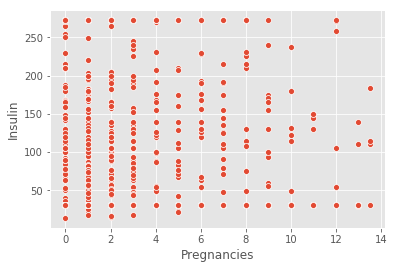

In [626]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin)

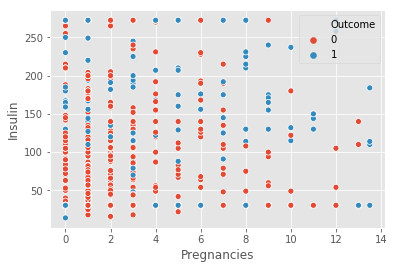

In [628]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin,hue=Diabetes.Outcome,x_jitter=True)

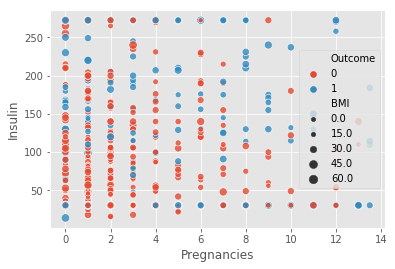

In [631]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.BMI,x_jitter=True,y_jitter=True,alpha=.8)

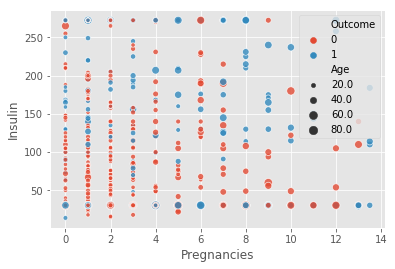

In [632]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.Age,x_jitter=True,y_jitter=True,alpha=.8)

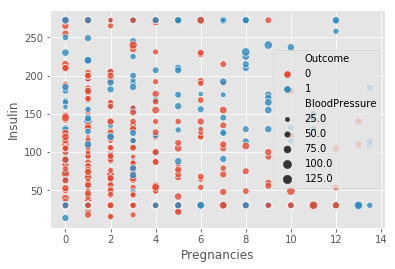

In [634]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.BloodPressure,x_jitter=True,y_jitter=True,alpha=.8)

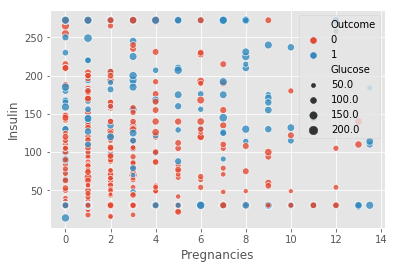

In [635]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.Glucose,x_jitter=True,y_jitter=True,alpha=.8)

1) As number of pregnancies increases , number of women having insulin level above 100 decreases

2) Majority of Diabetic women are above insulin level 100

3) Women having high insulin value and being diabetic still they are pregnant , it means insulin value and being diabetic isnt much of a complication

4) Most women are having high BMI , i.e they dont fall in idle range of BMI , most diabetic women who have high BMI are having high insulin level that is 100 and above

5) Since we know that number of pregnancies by a women are not usual , they are having pregnancies till 14 , so we can not state the High BMI of women is only because of diabeties, it can be because of the following :
    a) Number of pregnancies
    b) Obessity
    c) Diabetes
    
6) Mostly of Diabetic women have high insulin with low blood pressure that is 75 and below. There are few whose blood pressure is above 75 and below 120 , there blood pressure is in idle range but they have high insulin level , i.e 150 and above

7) Mostly those women who are diabetic and have high insulin level that is above 100 have high glucose level also i.e 100 and above

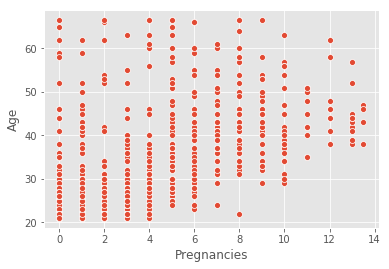

In [636]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Age)

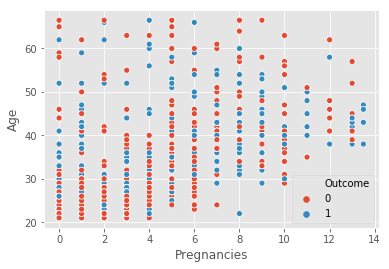

In [637]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Age,hue=Diabetes.Outcome)

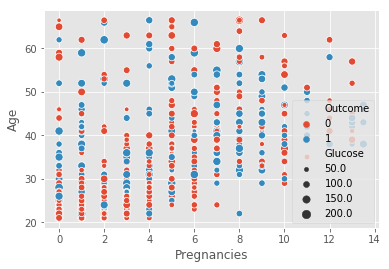

In [638]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Age,hue=Diabetes.Outcome,size=Diabetes.Glucose)

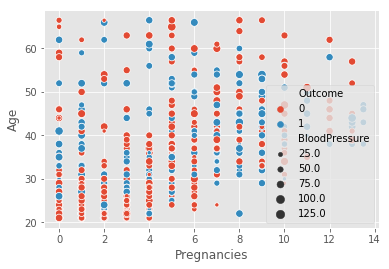

In [639]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Age,hue=Diabetes.Outcome,size=Diabetes.BloodPressure)

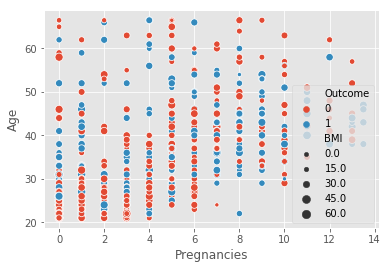

In [641]:
sns.scatterplot(Diabetes.Pregnancies,Diabetes.Age,hue=Diabetes.Outcome,size=Diabetes.BMI)

1) As the age increases number of pregnancies by women decreases 

2) It is peculiar to see that those women who have pregnancies above 10 they lie in age range of 35-55, which states that they would have gotten pregnant at very early stage of their life 

3) Most Diabetic women are above age of 35 also have pregnancies 6 and above 

4) Women above age of 30 have high glucose level that is 100 and above, low blood pressure that is 75 and below  and most of them are diabetic

5) Most women age above 30 and having number of pregnancies 6 and above are having BMI on higher side that is 30 and above


## Glucose vs Blood Pressure

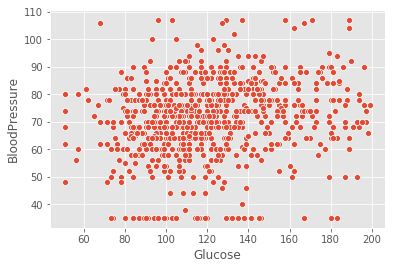

In [642]:
sns.scatterplot(Diabetes.Glucose,Diabetes.BloodPressure)

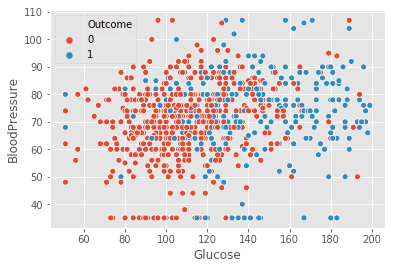

In [643]:
sns.scatterplot(Diabetes.Glucose,Diabetes.BloodPressure,hue=Diabetes.Outcome)

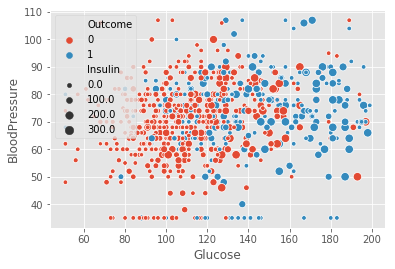

In [644]:
sns.scatterplot(Diabetes.Glucose,Diabetes.BloodPressure,hue=Diabetes.Outcome,size=Diabetes.Insulin)

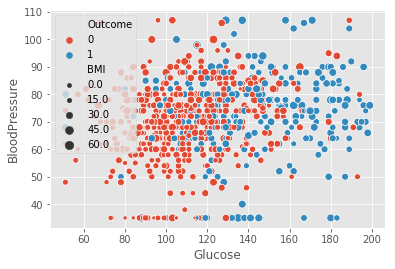

In [646]:
sns.scatterplot(Diabetes.Glucose,Diabetes.BloodPressure,hue=Diabetes.Outcome,size=Diabetes.BMI,x_jitter=True)

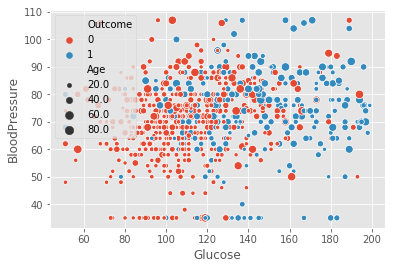

In [648]:
sns.scatterplot(Diabetes.Glucose,Diabetes.BloodPressure,hue=Diabetes.Outcome,size=Diabetes.Age,x_jitter=True)

1) There is higher concentration of women having BP in range of 50 to 90 and Glucose in range of 90 to 150

2) Concentration of Diabetic women is more where women have BP between 50 to 90 and Glucose in range of 120-400 , the same area of concentration of diabetic women have majority of women whose insulin level is 100 and above, it states that Glucose , BP and Insulin have some relation , specifically glucose and insulin, as we can see Higher the glucose level higher the insulin

3) Most of women who are diabetic and have higher glucose level that is 120 and above have higher BMI that is 30 and above , so BMI and Glucose tend to have a relation



## Glucose and SkinThickness

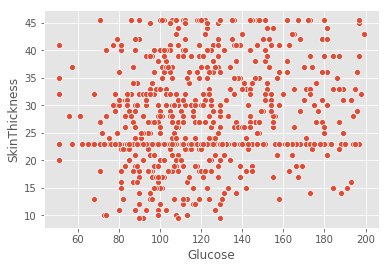

In [653]:
sns.scatterplot(Diabetes.Glucose,Diabetes.SkinThickness)

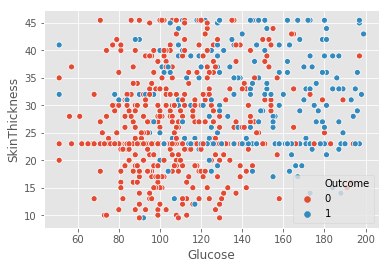

In [654]:
sns.scatterplot(Diabetes.Glucose,Diabetes.SkinThickness,hue=Diabetes.Outcome)

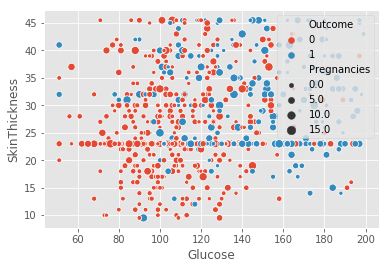

In [655]:
sns.scatterplot(Diabetes.Glucose,Diabetes.SkinThickness,hue=Diabetes.Outcome,size=Diabetes.Pregnancies)

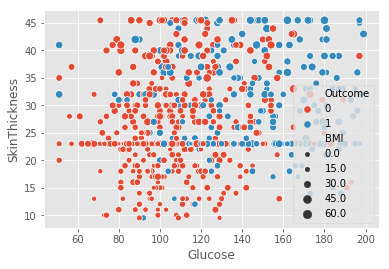

In [656]:
sns.scatterplot(Diabetes.Glucose,Diabetes.SkinThickness,hue=Diabetes.Outcome,size=Diabetes.BMI)

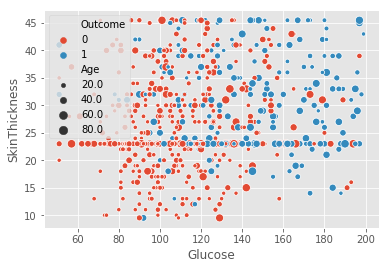

In [657]:
sns.scatterplot(Diabetes.Glucose,Diabetes.SkinThickness,hue=Diabetes.Outcome,size=Diabetes.Age)

1) As Glucose level increases , number of women having thicker skinthickness increases

2) Majority of concentration of diabetic women falls above glucose level of 120 and skin thickness 20 and above

3) Majority of diabetic women having pregnancies 5 and above had skin thickness 22.5 and above

4) Mojority of diabetic women having abnormal BMI that is 30 and above had skin thickness 22.5 and above and had glucose level 120 and above

5) Probability of women to have diabeties are very less if their skinthickness is less than 22.5


## Glucose and Insulin

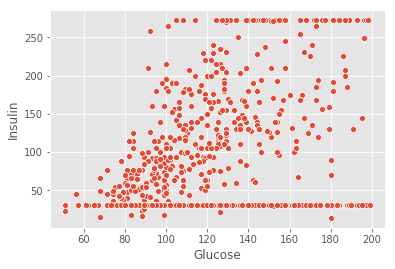

In [658]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Insulin)

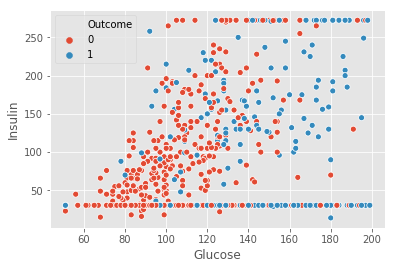

In [659]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Insulin,hue=Diabetes.Outcome)

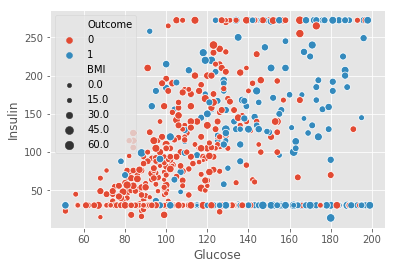

In [661]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.BMI)

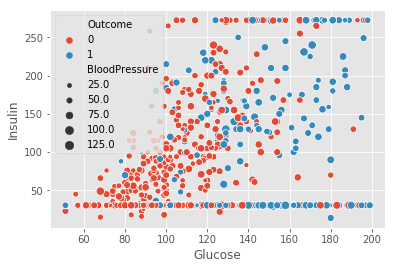

In [662]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.BloodPressure)

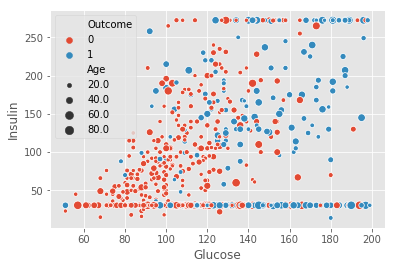

In [663]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Insulin,hue=Diabetes.Outcome,size=Diabetes.Age)

1) Glucose and Insulin shows a linear relationship, i.e with increase in glucose , insulin increases

2) Major concentration of diabetic women are having glucose levels 120 and above , insulin 100 and above

3) There is no definite increase in BMI due to fact of insulin and glucose

4) Majority of diabetic women have blood pressure in control hence , insulin and glucose doesnt have any effect on blood pressure

5) Majority of diabetic women of age 40 and above have Glucose level 120 and above and insulin 100 and above

## Glucose & DPF

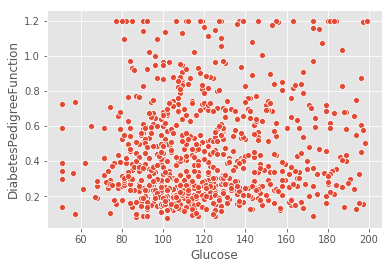

In [664]:
sns.scatterplot(Diabetes.Glucose,Diabetes.DiabetesPedigreeFunction)

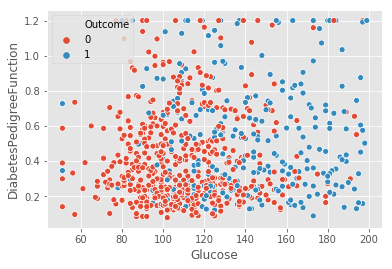

In [665]:
sns.scatterplot(Diabetes.Glucose,Diabetes.DiabetesPedigreeFunction,hue=Diabetes.Outcome)

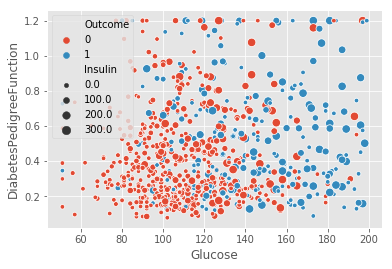

In [667]:
sns.scatterplot(Diabetes.Glucose,Diabetes.DiabetesPedigreeFunction,hue=Diabetes.Outcome,size=Diabetes.Insulin)

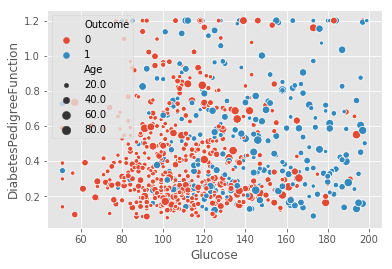

In [668]:
sns.scatterplot(Diabetes.Glucose,Diabetes.DiabetesPedigreeFunction,hue=Diabetes.Outcome,size=Diabetes.Age)

1) Major concentration of women is in section where glucose level range from 80 to 130 and DPF from 0 to .8

2) Majority of Diabetic women lies in section where glucose level is 120 and above and DPF range from 0 to .8

3) The probability of diabetic women to have high insulin level when DPF is .8 and above and Glucose level is 120 and above is more as compared to women having DPF lesser than .8

4) Majority of Diabetic women age 40 and abover are concentrated in section of DPF less than .7 and glucose level 140 and above


## Glucose & Age

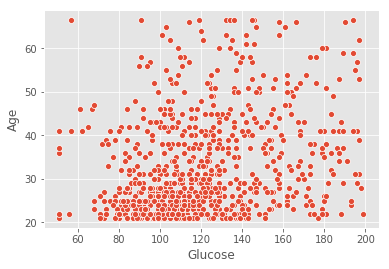

In [671]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Age)

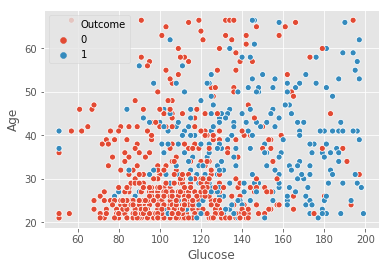

In [672]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Age,hue=Diabetes.Outcome)

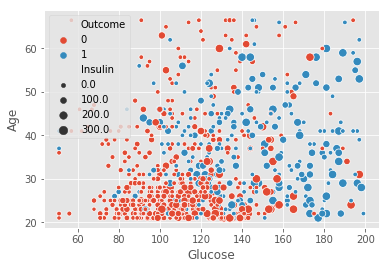

In [674]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Age,hue=Diabetes.Outcome,size=Diabetes.Insulin)

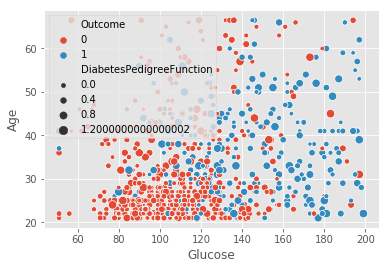

In [677]:
sns.scatterplot(Diabetes.Glucose,Diabetes.Age,hue=Diabetes.Outcome,size=Diabetes.DiabetesPedigreeFunction)

1) Majority of concentration of women are in section of age less than 32 and glucose level between 80 to 130 but probability of women having diabeties in this section is very ocassionally.

2) Almost all women of all age have diabeties whose glucose levels are 150 and above

3) Glucose is very important attribute to classify women diabetic or not 

4) Majority of women having high insulin value ie 100 and above,  have glucose level 150 and above and falls under age of 45

## Blood Pressure and Skin Thickness

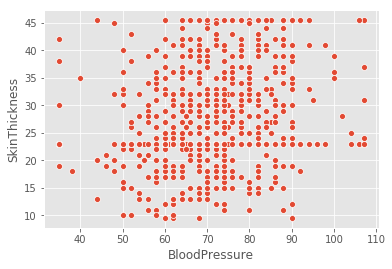

In [684]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.SkinThickness)

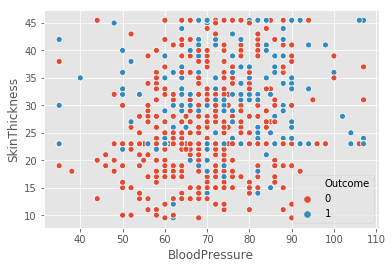

In [685]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.SkinThickness,hue=Diabetes.Outcome)

1) Blood Pressure and Skin Thickness doesnt seems to have any relation

## Blood Pressure and Insulin

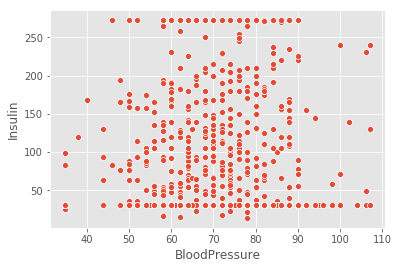

In [686]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.Insulin)

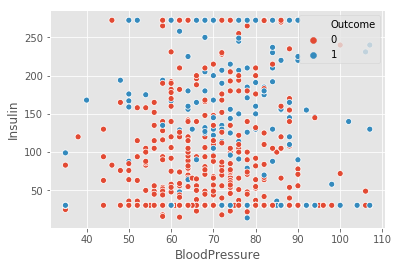

In [687]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.Insulin,hue=Diabetes.Outcome)

1) Blood Pressure and Insulin doesnt seems to have any relation

## BP & DPF

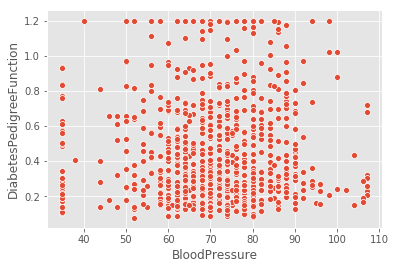

In [688]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.DiabetesPedigreeFunction)

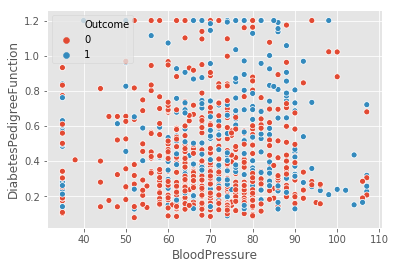

In [689]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.DiabetesPedigreeFunction,hue=Diabetes.Outcome)

No Relation Between Blood Pressure & DPF

## BP Vs Age

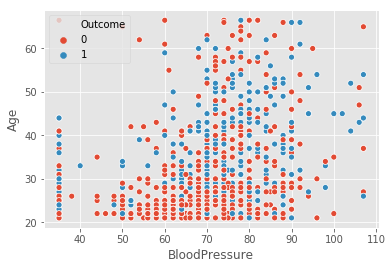

In [691]:
sns.scatterplot(Diabetes.BloodPressure,Diabetes.Age,hue=Diabetes.Outcome)

## Skin Thickness And BMI

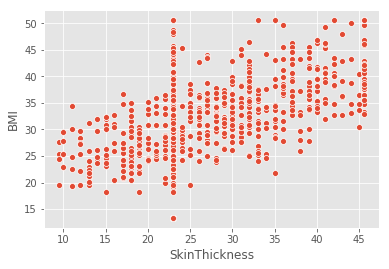

In [692]:
sns.scatterplot(Diabetes.SkinThickness,Diabetes.BMI)

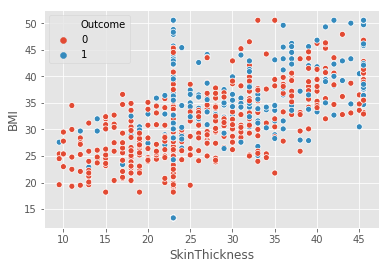

In [693]:
sns.scatterplot(Diabetes.SkinThickness,Diabetes.BMI,hue=Diabetes.Outcome)

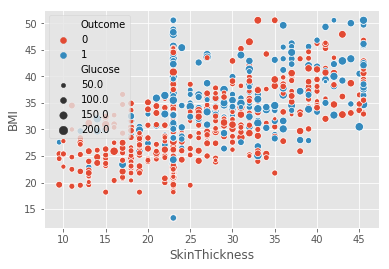

In [694]:
sns.scatterplot(Diabetes.SkinThickness,Diabetes.BMI,hue=Diabetes.Outcome,size=Diabetes.Glucose)

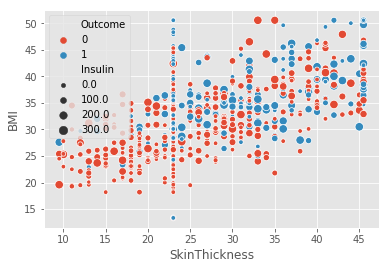

In [695]:
sns.scatterplot(Diabetes.SkinThickness,Diabetes.BMI,hue=Diabetes.Outcome,size=Diabetes.Insulin)

1) Skin Thickness and BMI have linear relationship where a unit change in skin thickness changes the BMI of women linearly 

2) Majority of diabetic women are concentrated in section where skin thickness is 22 and above and BMI 27 and above

3) Women who are diabetic, have BMI 27 or above and skin thickness above or 22 have higher glucose levels i.e 100 and above and also higher insulin levels 100 and above





## Insulin and BMI

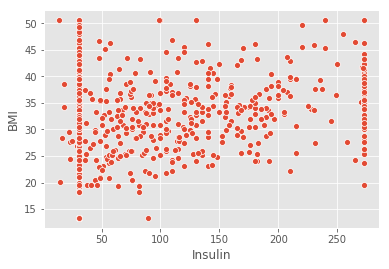

In [701]:
sns.scatterplot(Diabetes.Insulin,Diabetes.BMI)

/Users/himanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


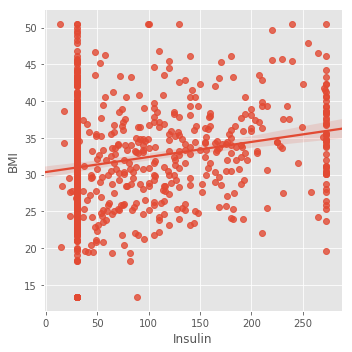

In [702]:
sns.lmplot(x='Insulin',y='BMI',data=Diabetes)

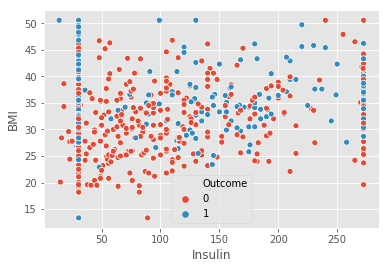

In [703]:
sns.scatterplot(Diabetes.Insulin,Diabetes.BMI,hue=Diabetes.Outcome)

1) Insulin and BMI has some sort of linear relationship but not perfect relation




# Correlation Plot



In [60]:
Diab=Diabetes.iloc[:,1:8]

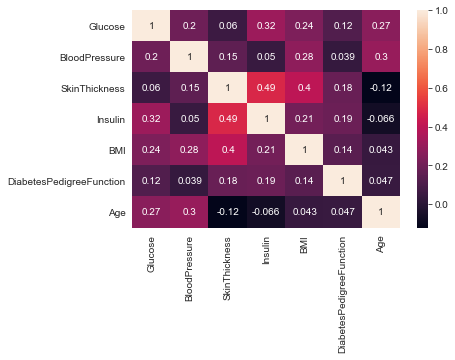

In [61]:
sns.heatmap(Diab.corr(),annot=True)

Few pairs of variables have good significat correlation of all :

1) SkinThickness and BMI

2) Insulin and Glucose

3) BMI and Insulin

4) BMI & BP

5) Age & Glucose

4) BP & Age



The relation between the two variables are both scientifically and statistically proven

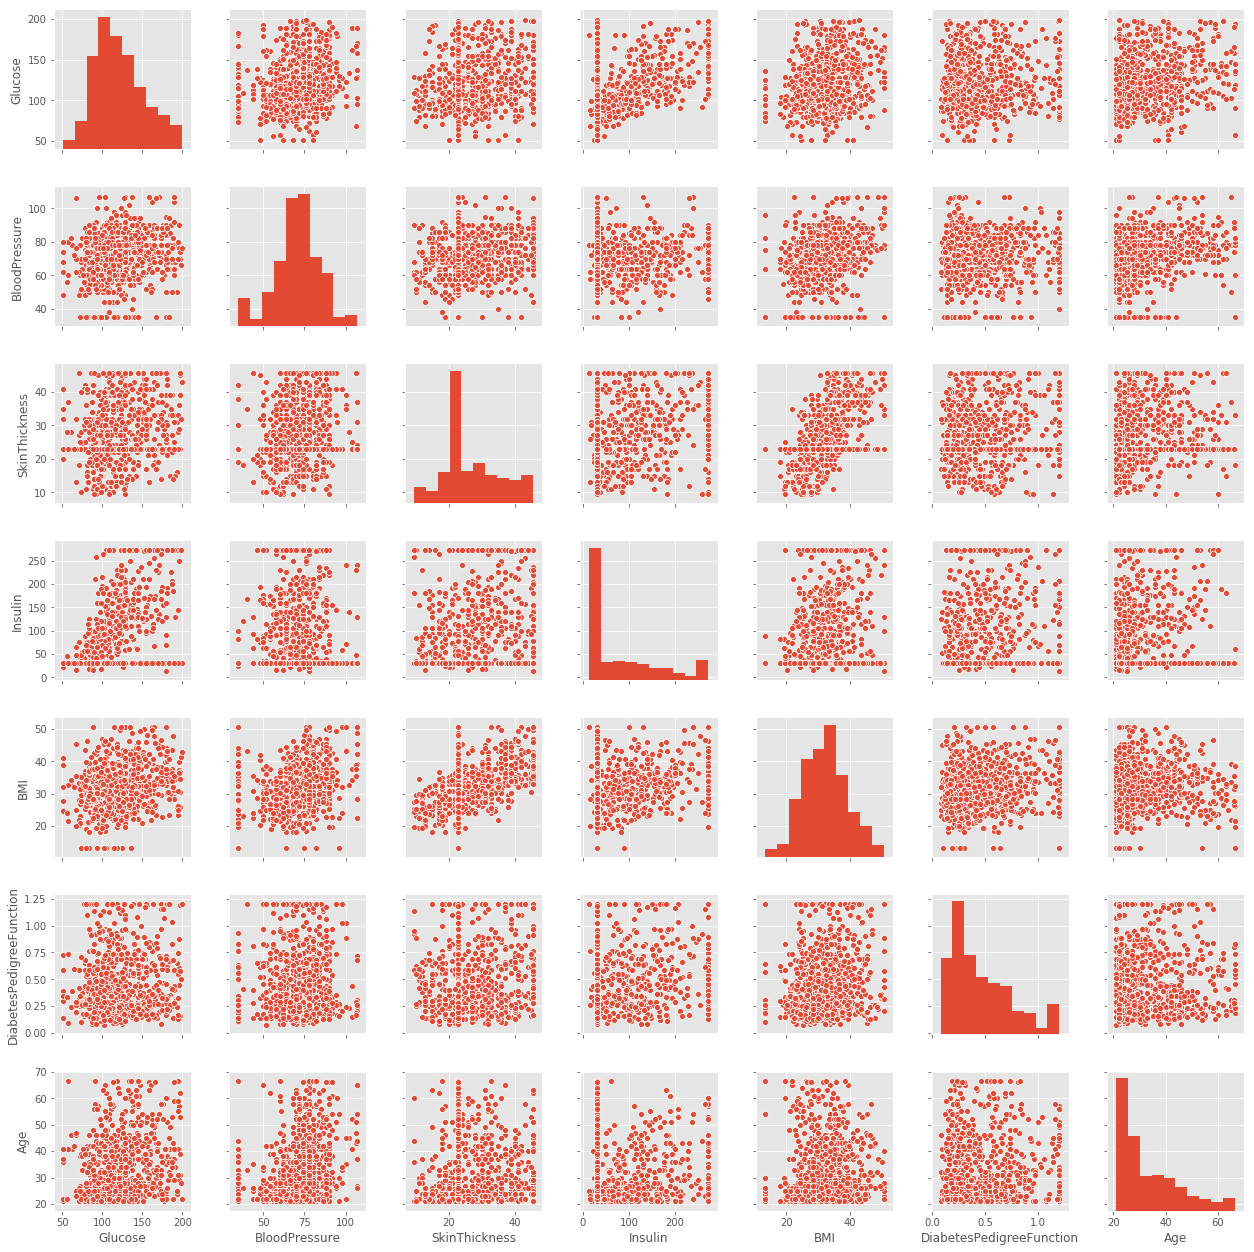

In [715]:
sns.pairplot(Diab)

Hence this pair plot justify and summarises the above exploratory and relationship finding methedology. Now we know which variables are having relationship and can be significant in classifying women diabetic or non diabetic . Also using the above findings we can use them to make some sort of rules or associations which will classify women as diabetic or non diabetic. 

**** It was a study on a skewed data hence there must be some affect of bias of any nature ****

In [709]:
Diabetes.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [721]:
Diab.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0    148.0           72.0           35.0     30.5  33.6   
1     85.0           66.0           29.0     30.5  26.6   
2    183.0           64.0           23.0     30.5  23.3   
3     89.0           66.0           23.0     94.0  28.1   
4    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     1.200  33.0

In [731]:
Diab['Thickness_Per_G']=Diab.SkinThickness/Diab.Glucose

Since SkinThickness and BMI are correlated , which is because skin thickness is indirectly a part of BMI as skin thickness states the thickness of the skin which is basicaly a mass index , and thickness of skin is due to obesity as one of the reason, hence obessed people must have high Glucose or sugar level, hence a new variable is being derived that is skinthickness per glucose level.

Earlier Glucose and BMI were not directly correlated but now Thickness_Per_G and BMI have a good correlation , which you can see below in the heat map.

**** Theoretically as BMI increases , insulin resistance also increases which results in increased blood glucose level. ****

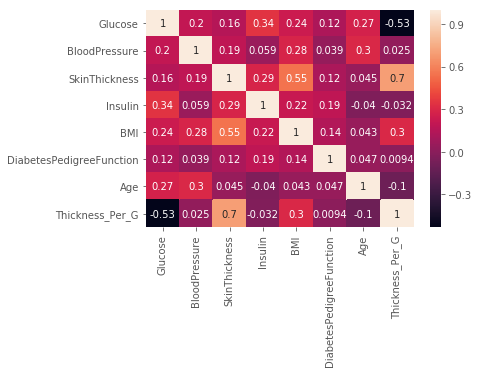

In [723]:
sns.heatmap(Diab.corr(),annot=True)

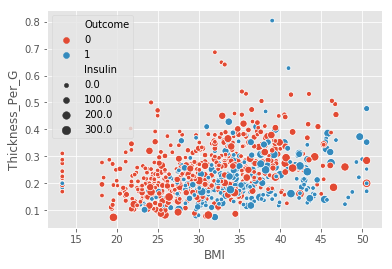

In [735]:
sns.scatterplot(Diab.BMI,Diab.Thickness_Per_G,hue=Diabetes.Outcome, size=Diab.Insulin)

As BMI increases , Thickness per glucose level also increases

Majority diabetic women have BMI 30 or above and Thickness per Glucose level is .4 or below

It is very rare that person with thickness per glucose  be higher than .6 and still be diabetic as there glucose level will be less and so does insulin level

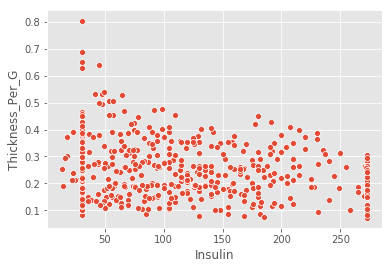

In [737]:
sns.scatterplot(Diab.Insulin,Diab.Thickness_Per_G)